# IMDB Sentiment Analysis!

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Download necessary NLTK data (corpora, tokenizers)

In [2]:
nltk.download('punkt', download_dir='C:\Projects\IMDB Sentiment Analysis')
nltk.download('stopwords', download_dir='C:\Projects\IMDB Sentiment Analysis')

[nltk_data] Downloading package punkt to C:\Projects\IMDB Sentiment
[nltk_data]     Analysis...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Projects\IMDB
[nltk_data]     Sentiment Analysis...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
#loading the resources
nltk.data.path.append('C:\Projects\IMDB Sentiment Analysis')

In [4]:
#for counting the number of words in given text
#Split the text into words and count them
def get_wordcounts(text):
    return len(text.split())

#Function to count the number of characters in a given text
#Return the total number of characters in the text
def get_charcounts(text):
    return len(text)

#Function to calculate the average word length in a given text
def get_avg_wordlength(text):
    words = text.split()
    return sum(len(word) for word in words) / len(words) if words else 0

#to count the number of stopwords in a given text
def get_stopwords_counts(text):
    stop_words = set(stopwords.words('english'))
    return sum(1 for word in text.split() if word in stop_words)

#Function to remove HTML tags from a given text
#also replace HTML tags with an empty string
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

#function that removes stopwords from the text to make it more meaningful for analysis.
#After removing the stopwords, it returns the remaining words as a clean string.
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

In [5]:
def get_avg_wordlength(text):
    words = text.split()
    words = [word.strip('.,!?;:').strip() for word in words]  # remove punctuation
    return sum(len(word) for word in words) / len(words) if words else 0

# Loading the Dataset

In [6]:
df = pd.read_csv('IMDB Dataset.csv')

# Data Preprocessing

In [7]:
df['word_counts'] = df['review'].apply(get_wordcounts)
df['char_counts'] = df['review'].apply(get_charcounts)
df['avg_wordlength'] = df['review'].apply(get_avg_wordlength)
df['stopwords_counts'] = df['review'].apply(get_stopwords_counts)

In [8]:
df['review_without_stopwords'] = df['review'].apply(remove_stopwords)

In [9]:
df.head()

,review,sentiment,word_counts,char_counts,avg_wordlength,stopwords_counts,review_without_stopwords
0,One of the other reviewers has mentioned that ...,positive,307,1761,4.622150,122,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,162,998,5.086420,62,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...,positive,166,926,4.518072,70,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,138,748,4.333333,58,Basically there's family little boy (Jake) thi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1317,4.626087,92,"Petter Mattei's ""Love Time Money"" visually stu..."


In [10]:
df.columns

Index(['review', 'sentiment', 'word_counts', 'char_counts', 'avg_wordlength',
       'stopwords_counts', 'review_without_stopwords'],
      dtype='object')

# Data Visualizations

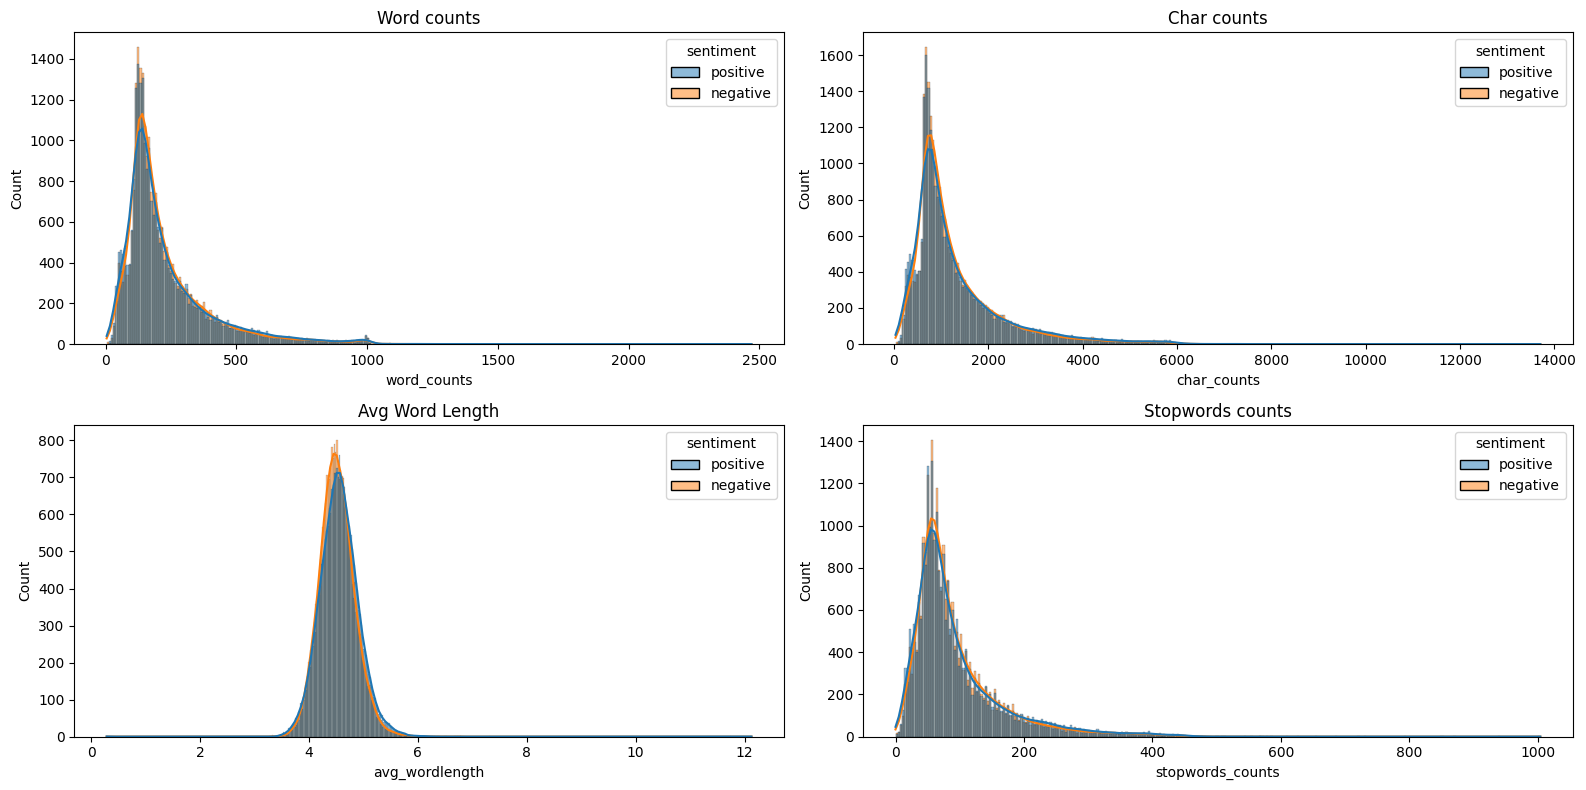

In [11]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
# sns.barplot(x='sentiment', y='word_counts', data=df)
sns.histplot(data=df, x='word_counts', hue='sentiment', kde=True)
plt.title('Word counts')

plt.subplot(2,2,2)
sns.histplot(data=df, x='char_counts', hue='sentiment', kde=True)
plt.title('Char counts')

plt.subplot(2,2,3)
sns.histplot(data=df, x='avg_wordlength', hue='sentiment', kde=True)
plt.title('Avg Word Length')

plt.subplot(2,2,4)
sns.histplot(data=df, x='stopwords_counts', hue='sentiment', kde=True)
plt.title('Stopwords counts')

plt.tight_layout()
plt.show()

# Model building and word embedding

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], 
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=df['sentiment']
                                                   )

In [13]:
X_train.shape, X_test.shape

((40000,), (10000,))

In [14]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])
clf.fit(X_train, y_train)

,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [15]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      5000
    positive       0.90      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

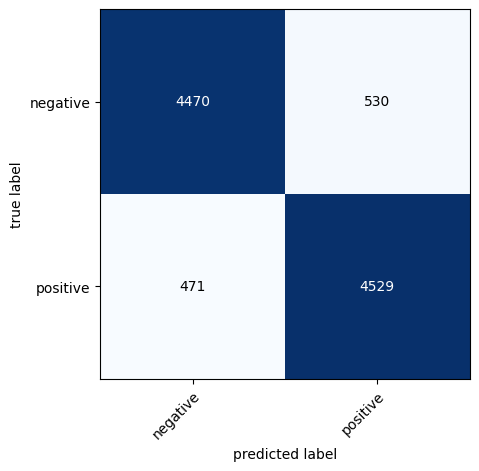

In [16]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

In [17]:
# Testing with sample predictions
print(clf.predict(['Wow, this is amazing lesson']))
print(clf.predict(['Wow, this sucks']))
print(clf.predict(['please like this video. it helps me a lot']))

['positive']
['negative']
['positive']


In [ ]:
# Saving the model
pickle.dump(clf, open('sentiment_analysis.pkl', 'wb'))